# Aging Risk Assessment: data exploration


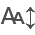

In [1]:
import polars as pl
import pandas as pd
import numpy as np
import polars.selectors as cs

import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
                                                                                   
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# About dataset:
The `.csv` dataset is designed to predict the aging outcomes of individuals based on various demographic, lifestyle, and health-related features. The dataset classifies individuals into three aging categories: Healthy, At-risk, and Frail. It includes 13 feature columns representing attributes like age, gender, income, and physical activity, which influence aging trajectories

This dataset contains 3456 records and is intended for machine learning tasks, particularly classification and regression. It includes synthetic data on aging prediction, where the outcome variable is derived from several features related to an individual's health and lifestyle. The dataset aims to assist in understanding aging patterns and predicting the likelihood of an individual falling into one of the three aging categories: Healthy, At-risk, or Frail. It provides valuable insights into age-related health outcomes based on demographic and lifestyle factors.

In [2]:
df = pl.read_csv('data/Aging_prediction_dataset.csv')
df

Loading ITables v2.4.5 from the init_notebook_mode cell... (need help?)


# Dependent variable: `aging_outcome`
The target variable representing the aging category, with values "Healthy", "At-risk", or "Frail", determined by a scoring function based on the above attributes.

The target variable has ordinal scale with gradient from fine condition "Healthy" to severe "Frail". The distribution is euqal between all three outcomes

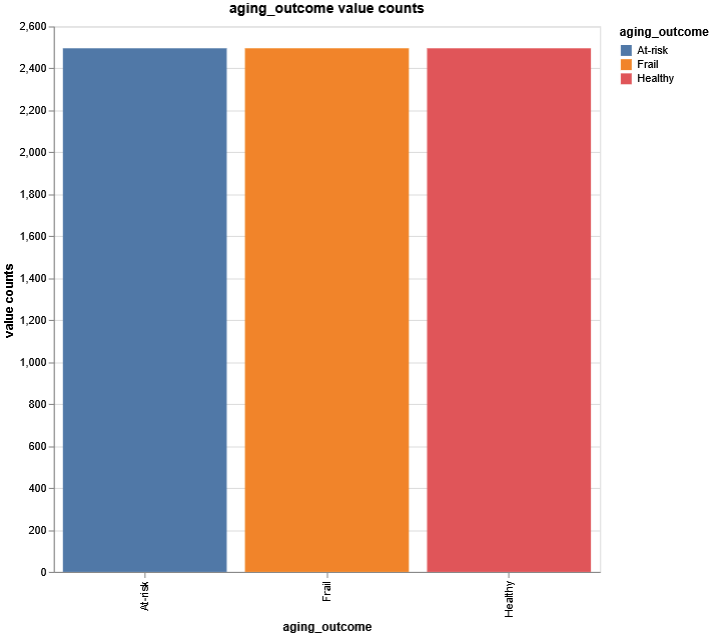

In [3]:
df.group_by('aging_outcome').len().rename({'len':'value counts'}).plot.bar(x='aging_outcome', y='value counts', color='aging_outcome').properties(width=500, height=500, title="aging_outcome value counts")

alt.Chart(...)

# Independant variabels

## `age` 
The age of the individual, expressed in years (Range: 40-90). Let's see distribution of the `age` within groups by 10. The variable is numerical.

The most populated group is `40-50` and the least populated is `70-80`

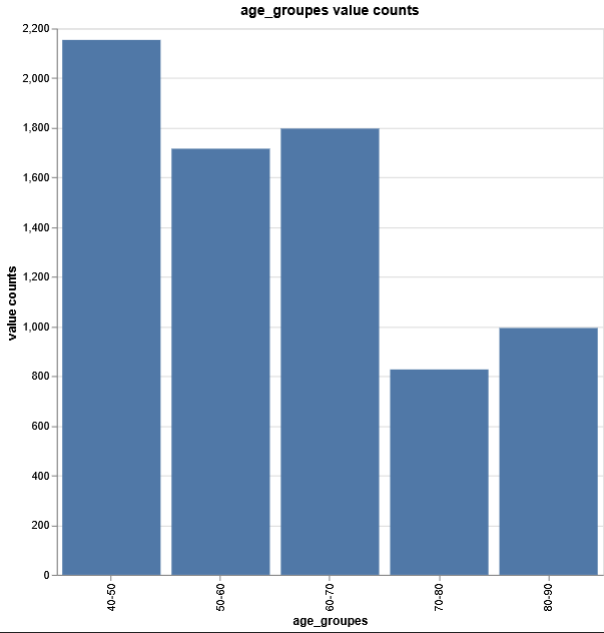

In [4]:
bins = [50, 60, 70, 80]
labels = ['40-50', '50-60', '60-70', '70-80', '80-90']

age_grouped = df.with_columns(
    age_groupes = pl.col("age").cut(bins, labels=labels)
)

age_grouped.group_by('age_groupes').len().rename({'len':'value counts'}).plot.bar(x='age_groupes', y='value counts').properties(width=500, height=500, title="age_groupes value counts")

alt.Chart(...)

## `gender` 
The gender of the individual, with values "Male" or "Female". This is a nominal variable

The most populated group is `Male`

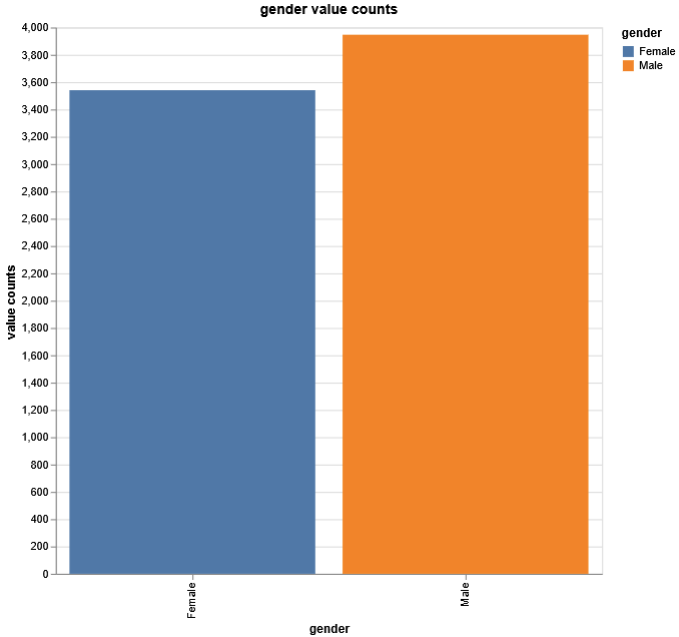

In [5]:
df.group_by('gender').len().rename({'len':'value counts'}).plot.bar(x='gender', y='value counts', color='gender').properties(width=500, height=500, title="gender value counts")

alt.Chart(...)

## `education_years` 
The number of years of formal education the individual has completed (Range: 0-20 years). The variable is numerical. The most number of years of reveived education is 12 to 14 years

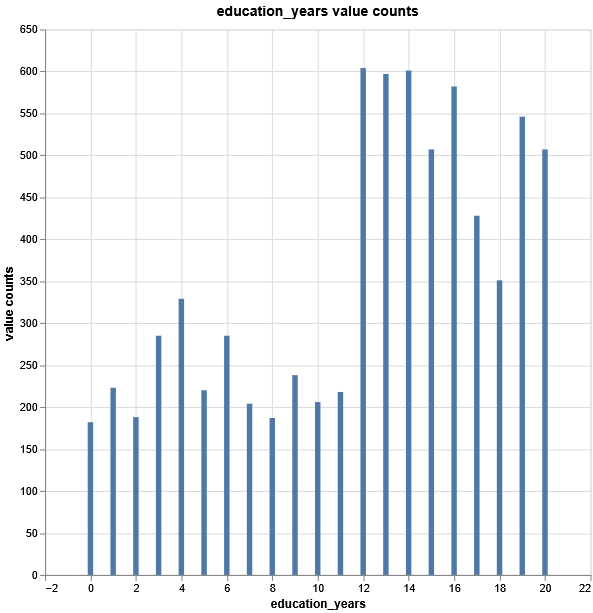

In [6]:
age_grouped.group_by('education_years').len().rename({'len':'value counts'}).plot.bar(x='education_years', y='value counts').properties(width=500, height=500, title="education_years value counts")

alt.Chart(...)

## `income_level` 
The individual's income level, categorized as "Low", "Medium", or "High". The variable is ordinal with gradient from "High" to "Low". The most populated group is `High` income level

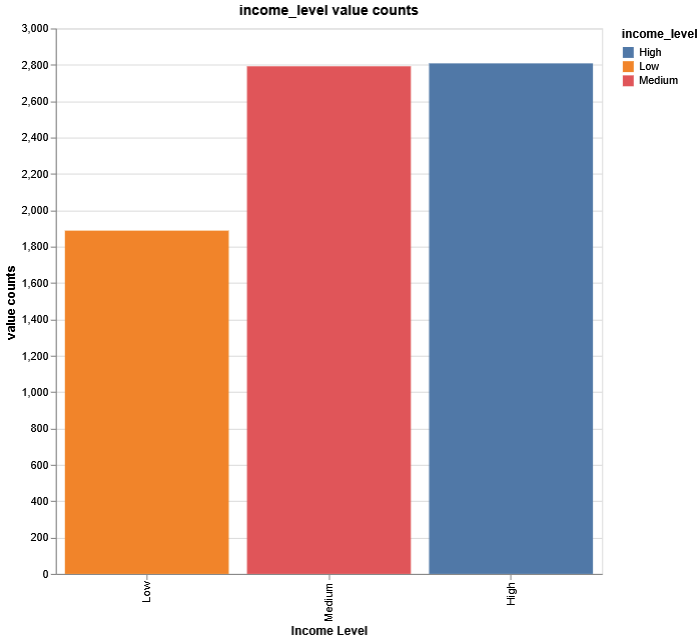

In [7]:
(
    df
    .group_by('income_level').len().rename({'len':'value counts'})
    .plot.bar(x=alt.X('income_level:N', 
            sort=["Low", "Medium", "High"],
            title="Income Level"), y='value counts', color='income_level')
    .properties(width=500, height=500, title="income_level value counts")
)

alt.Chart(...)

## `physical_activity` 
The level of physical activity of the individual, categorized as "Low", "Moderate", or "High". The variable is ordinal with gradient from "High" to "Low". The most populated group is `High` physical activity level

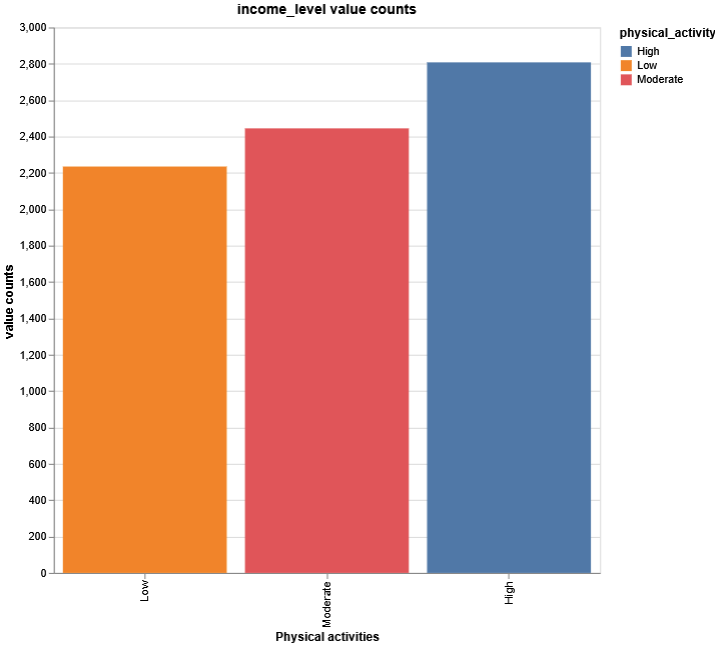

In [8]:
(
    df
    .group_by('physical_activity').len().rename({'len':'value counts'})
    .plot.bar(x=alt.X('physical_activity:N', 
            sort=["Low", "Moderate", "High"],
            title="Physical activities"), y='value counts', color='physical_activity')
    .properties(width=500, height=500, title="income_level value counts")
)

alt.Chart(...)

## `smoking_status` 
The smoking behavior of the individual, with values "Never", "Former", or "Current". The variable is nominal. The most populated group is never-smokers

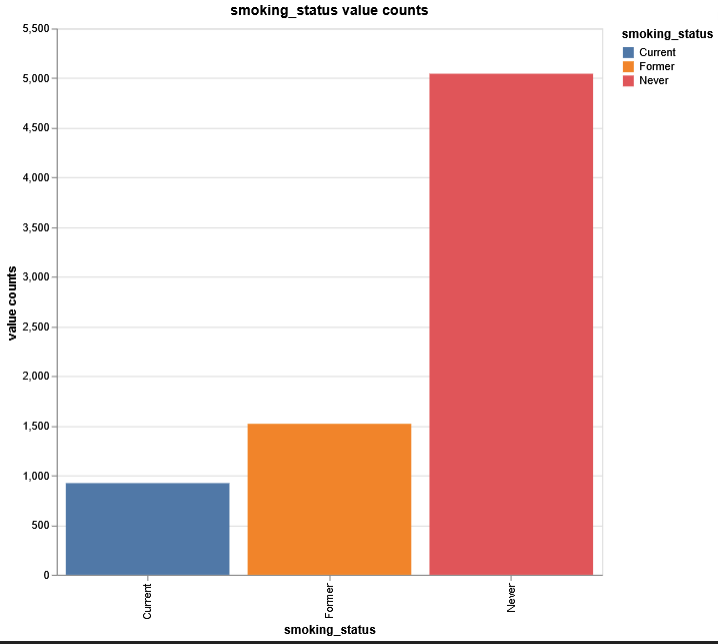

In [9]:
df.group_by('smoking_status').len().rename({'len':'value counts'}).plot.bar(x='smoking_status', y='value counts', color='smoking_status').properties(width=500, height=500, title="smoking_status value counts")

alt.Chart(...)

## `chronic_conditions` 
The number of chronic health conditions reported, generated with a Poisson distribution (Mean: 2). The variable is ordinal. The most populated number of chronic conditions is `1`
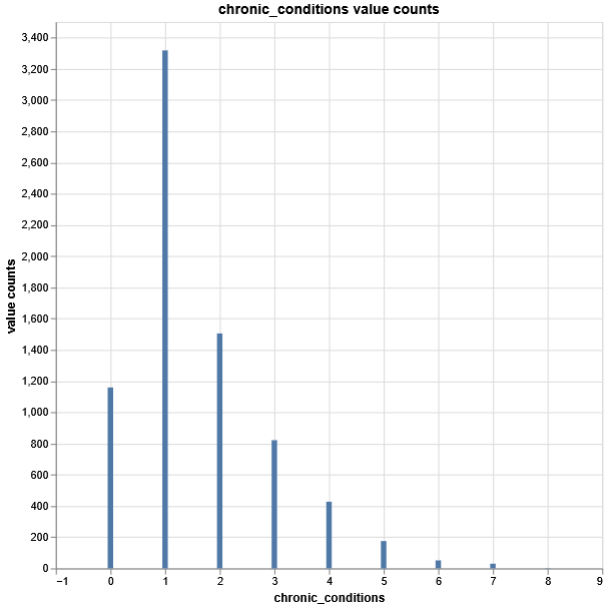

In [10]:
df.group_by('chronic_conditions').len().rename({'len':'value counts'}).plot.bar(x='chronic_conditions', y='value counts').properties(width=500, height=500, title="chronic_conditions value counts")

alt.Chart(...)

## `memory_score` 
A score representing the memory performance of the individual, derived from a normal distribution (Mean: 75, Range: 0-100). The variable is ordinal. Let's see distribution of the `memory_score` within groups by 10. The variable is numerical.

The most populated group is `80-90`

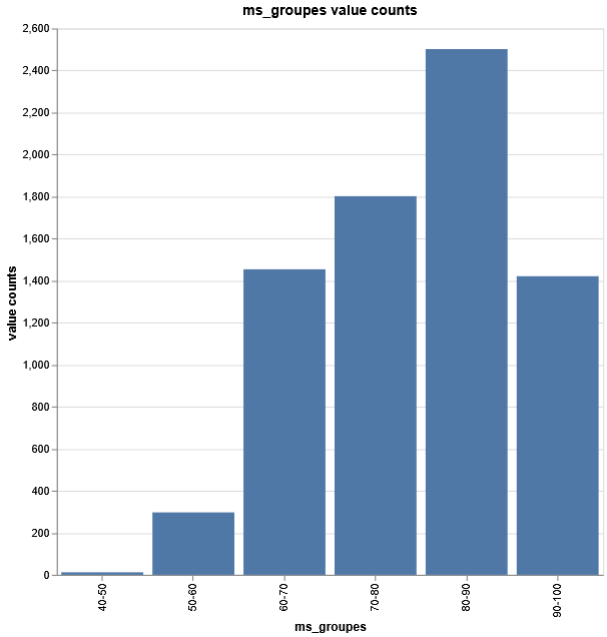

In [11]:
bins = [x for x in range(10, 91, 10)]
labels = [f'{x - 10}-{x}' for x in bins] + ['90-100']

ms_grouped = df.with_columns(
    ms_groupes = pl.col("memory_score").cut(bins, labels=labels)
)

ms_grouped.group_by('ms_groupes').len().rename({'len':'value counts'}).plot.bar(x='ms_groupes', y='value counts').properties(width=500, height=500, title="ms_groupes value counts")

alt.Chart(...)

## `bmi` 
The Body Mass Index of the individual, modeled with a normal distribution (Mean: 25, SD: 4). The variable is numerical.

In [12]:
print(f'bmi min: {df['bmi'].min()}')
print(f'bmi max: {df['bmi'].max()}')
print(f'bmi mean: {df['bmi'].mean()}')
print(f'bmi median: {df['bmi'].median()}')
print(f'bmi std: {df['bmi'].std()}')

bmi min: 9.1
bmi max: 38.5
bmi mean: 24.177443910256418
bmi median: 23.9
bmi std: 3.4845327926063603


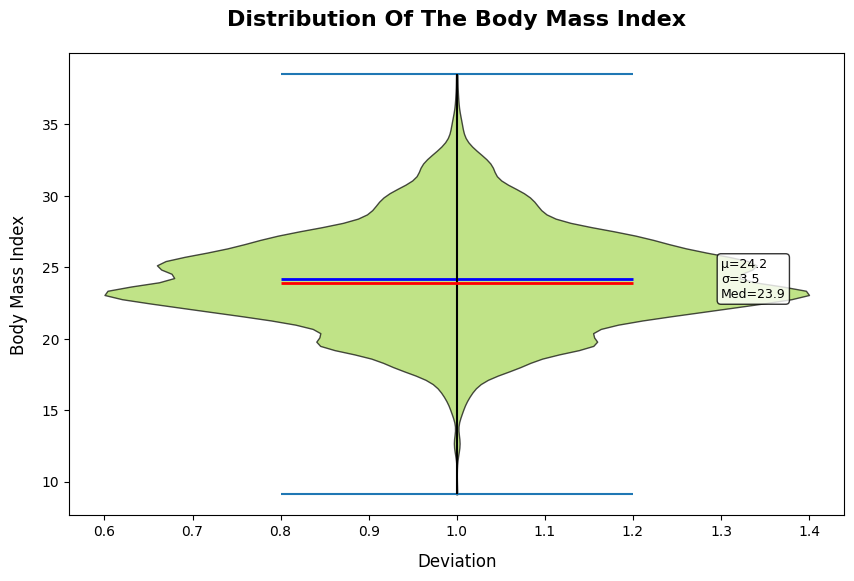

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
single_data = df.to_pandas()['bmi']

violins = ax.violinplot([single_data], showmeans=True, showmedians=True, widths=0.8)

pc = violins['bodies'][0]
pc.set_facecolor(plt.cm.Set2(0.5))  
pc.set_edgecolor('black')
pc.set_alpha(0.7)
pc.set_linewidth(1)

violins['cmedians'].set_color('red')
violins['cmedians'].set_linewidth(2)
violins['cmeans'].set_color('blue')
violins['cmeans'].set_linewidth(2)
violins['cbars'].set_color('black')
violins['cbars'].set_linewidth(1.5)

y_data = single_data.values
x_data = np.random.normal(1, 0.05, size=len(y_data))  
mean_val = single_data.mean()
std_val = single_data.std()
median_val = single_data.median()

ax.text(1.3, mean_val, f'μ={mean_val:.1f}\nσ={std_val:.1f}\nMed={median_val:.1f}', 
        fontsize=9, va='center',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax.set_title('Distribution Of The Body Mass Index', 
             fontsize=16, fontweight='bold', pad=20)

ax.set_xlabel('Deviation', fontsize=12, labelpad=10)

ax.set_ylabel('Body Mass Index', fontsize=12, labelpad=10)
plt.show()

## `blood_pressure` 
The individual's blood pressure, recorded as a random integer between 100 and 180. The variable is numerical.

In [14]:
print(f'blood_pressure min: {df['blood_pressure'].min()}')
print(f'blood_pressure max: {df['blood_pressure'].max()}')
print(f'blood_pressure mean: {df['blood_pressure'].mean()}')
print(f'blood_pressure median: {df['blood_pressure'].median()}')
print(f'blood_pressure std: {df['blood_pressure'].std()}')

blood_pressure min: 100
blood_pressure max: 179
blood_pressure mean: 138.66199252136752
blood_pressure median: 134.0
blood_pressure std: 23.261320284539657


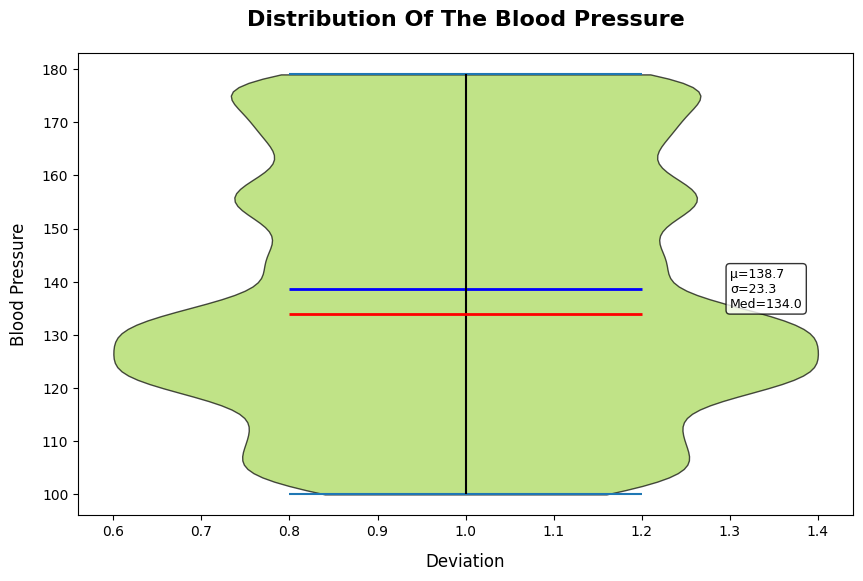

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
single_data = df.to_pandas()['blood_pressure']

violins = ax.violinplot([single_data], showmeans=True, showmedians=True, widths=0.8)

pc = violins['bodies'][0]
pc.set_facecolor(plt.cm.Set2(0.5))  
pc.set_edgecolor('black')
pc.set_alpha(0.7)
pc.set_linewidth(1)

violins['cmedians'].set_color('red')
violins['cmedians'].set_linewidth(2)
violins['cmeans'].set_color('blue')
violins['cmeans'].set_linewidth(2)
violins['cbars'].set_color('black')
violins['cbars'].set_linewidth(1.5)

y_data = single_data.values
x_data = np.random.normal(1, 0.05, size=len(y_data))  
mean_val = single_data.mean()
std_val = single_data.std()
median_val = single_data.median()

ax.text(1.3, mean_val, f'μ={mean_val:.1f}\nσ={std_val:.1f}\nMed={median_val:.1f}', 
        fontsize=9, va='center',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax.set_title('Distribution Of The Blood Pressure', 
             fontsize=16, fontweight='bold', pad=20)

ax.set_xlabel('Deviation', fontsize=12, labelpad=10)

ax.set_ylabel('Blood Pressure', fontsize=12, labelpad=10)
plt.show()

## `diet_quality` 
The quality of the individual's diet, categorized as "Poor", "Average", or "Good". The variable is ordinal with gradient from "Good" to "Poor". The most populated group is `Good` diet quality level

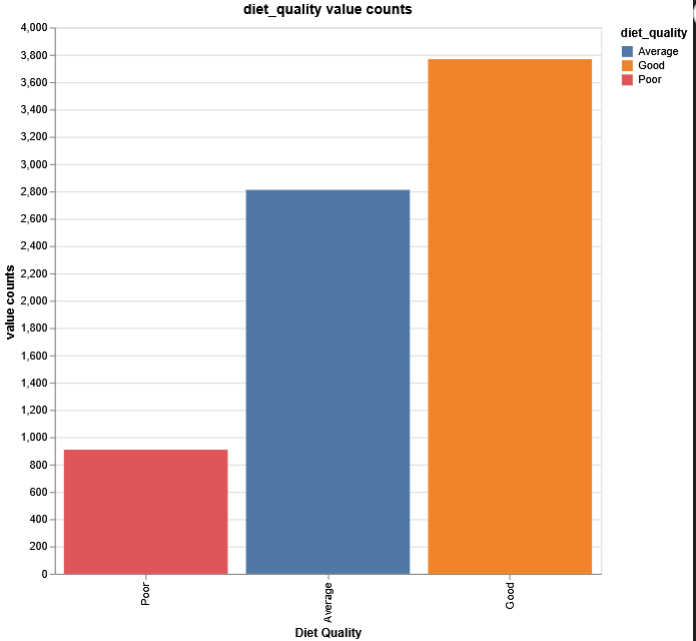

In [16]:
(
    df
    .group_by('diet_quality').len().rename({'len':'value counts'})
    .plot.bar(x=alt.X('diet_quality:N', 
            sort=["Poor", "Average", "Good"],
            title="Diet Quality"), y='value counts', color='diet_quality')
    .properties(width=500, height=500, title="diet_quality value counts")
)

alt.Chart(...)

## `alcohol_consumption` 
The alcohol consumption level of the individual, with values "None", "Moderate", or "Heavy". The variable is ordinal with gradient from "None" to "Heavy". The most populated group is `None` alcohol consumption level

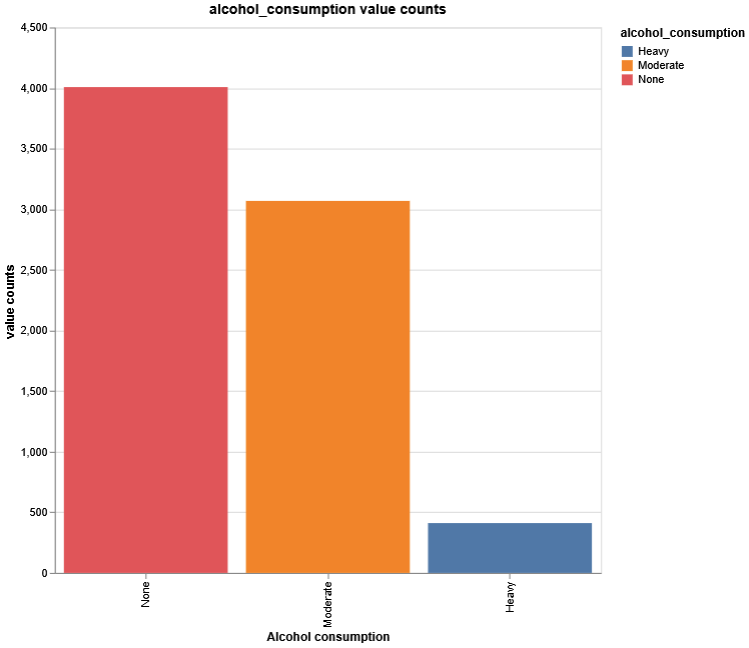

In [23]:
(
    df
    .group_by('alcohol_consumption').len().rename({'len':'value counts'})
    .plot.bar(x=alt.X('alcohol_consumption:N', 
            sort=["None", "Moderate", "Heavy"],
            title="Alcohol consumption"), y='value counts', color='alcohol_consumption')
    .properties(width=500, height=500, title="alcohol_consumption value counts")
)

alt.Chart(...)

## `social_engagement` 
The individual's level of social engagement, categorized as "Low", "Moderate", or "High". The variable is ordinal with gradient from "High" to "Low". The most populated group is `Moderate` social engagement level

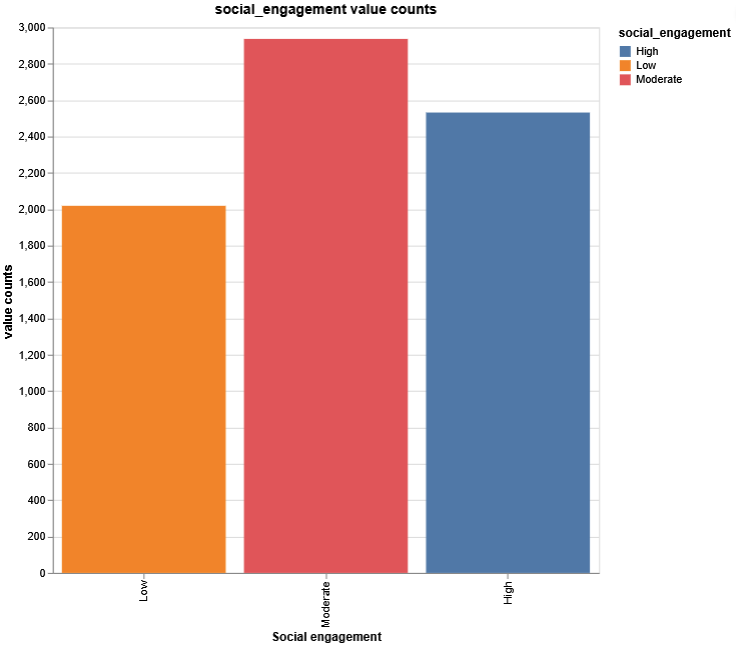

In [24]:
(
    df
    .group_by('social_engagement').len().rename({'len':'value counts'})
    .plot.bar(x=alt.X('social_engagement:N', 
            sort=["Low", "Moderate", "High"],
            title="Social engagement"), y='value counts', color='social_engagement')
    .properties(width=500, height=500, title="social_engagement value counts")
)

alt.Chart(...)

# numeric variable relationship

Let's examine how numeric variables are related to each other. As we can see there no notable relations between numerical variables at all

<Figure size 1000x800 with 0 Axes>

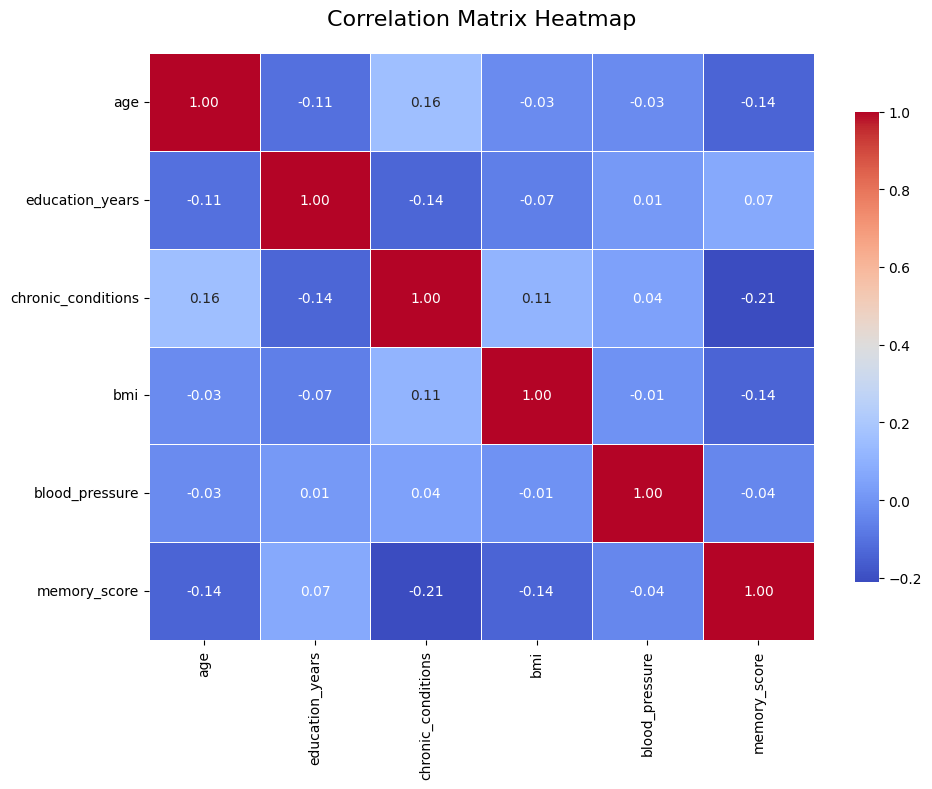

In [30]:
df_corr = df[['age', 'education_years', 'chronic_conditions', 'bmi', 'blood_pressure', 'memory_score']].to_pandas().corr()
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    df_corr,
    annot=True,              
    fmt=".2f",                
    cmap="coolwarm",          
    linewidths=0.5,           
    linecolor="white",       
    cbar=True,                
    cbar_kws={"shrink": 0.8},
    ax=ax
)
plt.title('Correlation Matrix Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

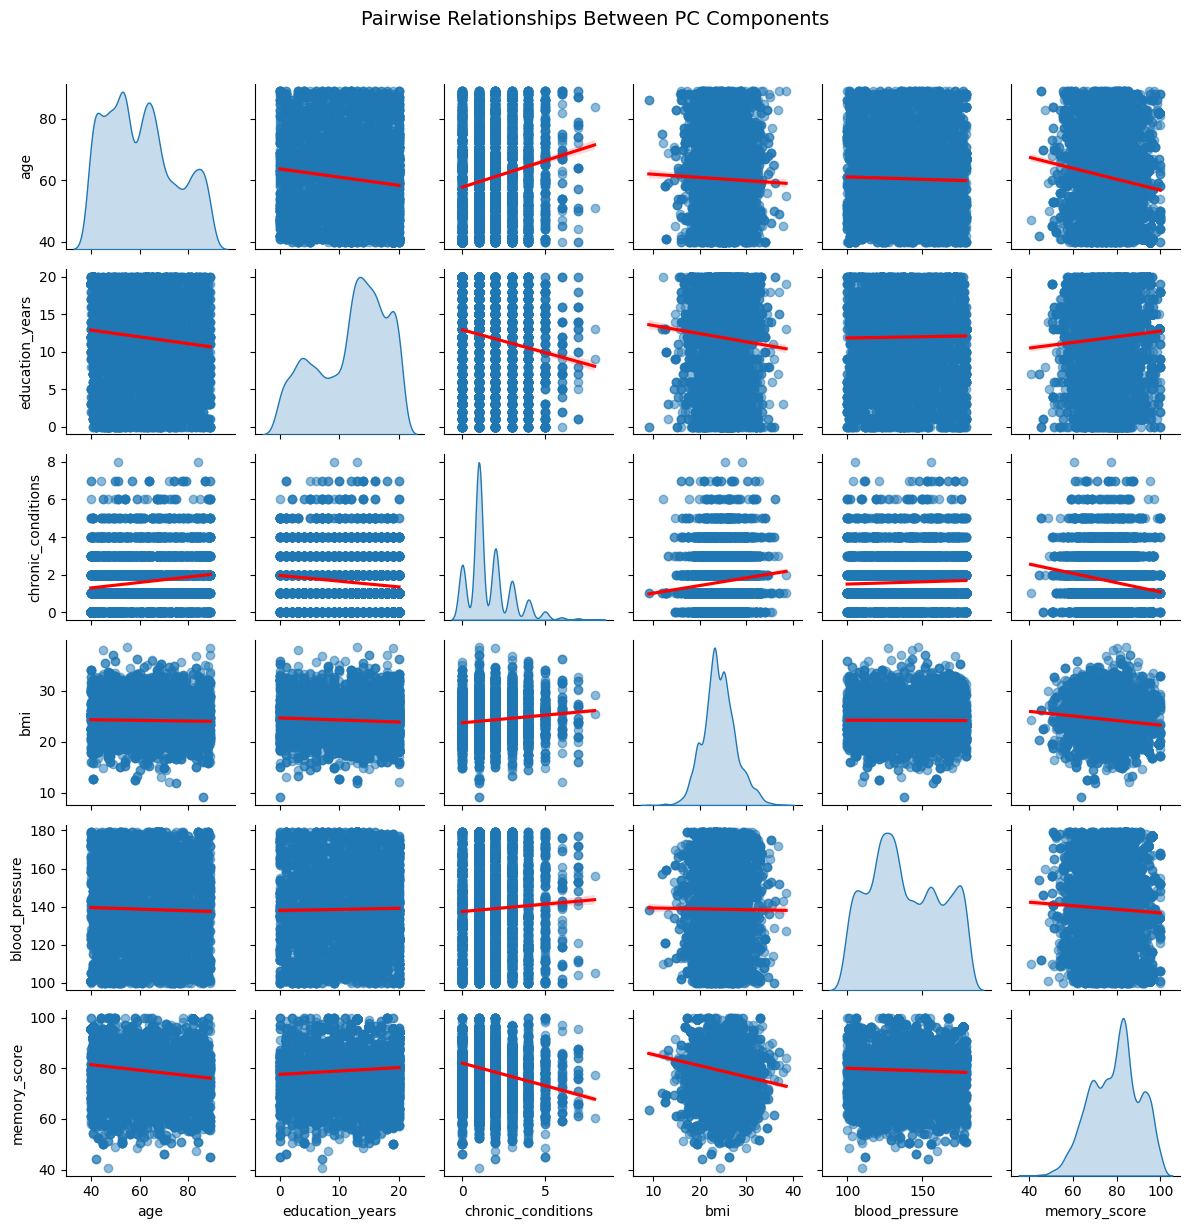

In [29]:
df1 = df[['age', 'education_years', 'chronic_conditions', 'bmi', 'blood_pressure', 'memory_score']].to_pandas()

plt.figure(figsize=(10, 8))
pairplot = sns.pairplot(
    df1,
    kind='reg',          
    diag_kind='kde',    
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}},
    corner=False,       
    height=2
)

# Add title (requires manual adjustment)
pairplot.fig.suptitle("Pairwise Relationships Between PC Components", 
                     y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# Summary

Overall the dataset contained 5 numerical, 8 ordinal, and 2 nominal varables with target being an ordinal variable which allows us to explore methods of strict classification and ordinal regressions. We can apply for example Random Forest methods or choice regressions. Because of abscence of linear relationships between numeric variaables ordinal linear methods would not be considered